# Titanic - Machine Learning from Disaster
### Predict survival on the Titanic
- Defining the problem statement
- Collecting the data & Reading it
- Exploratory data analysis
- Data preprocessing & Feature engineering 
- Modelling
- Testing

## 1. Defining the problem statement

Complete the analysis of what sorts of people were likely to survive.  
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

## 2. Collecting & Reading Data 

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [44]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline



In [ ]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")


## 3. Exploratory data analysis EDA

To understand the distribution of features, handle missing values, and identify correlations.

In [3]:
# Display first 10 rows
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton 

In [4]:
#info to check is there categorical data or missing at all
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


So we have 891 rows as id,Alot nulls in Age and cabin and some in Embarked        
features  Data are mix of cat and int values

In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
# Summary statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Bar Chart for Categorical Features
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

In [8]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

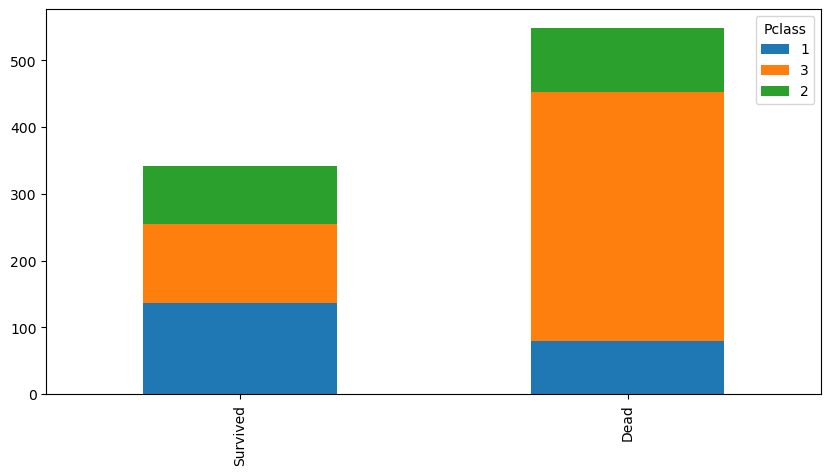

In [9]:
bar_chart('Pclass')

The char confirmed that 1st class tickets more likely survived and 3st class most of them dead.

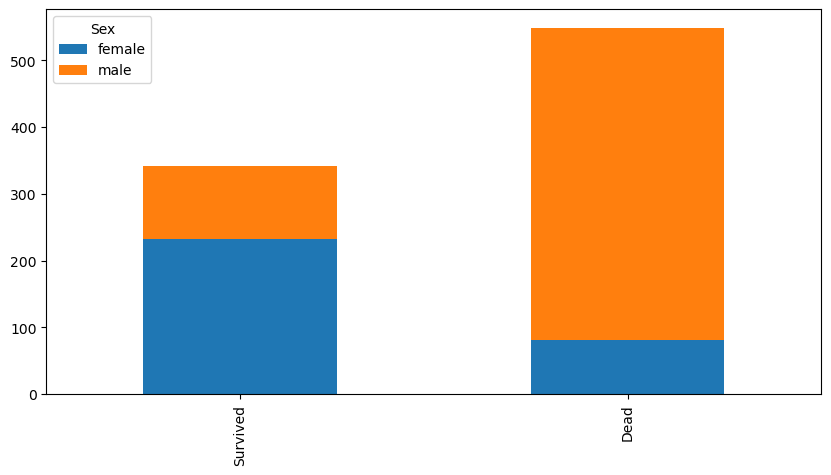

In [10]:
bar_chart('Sex')

The char confirmed that female more survived

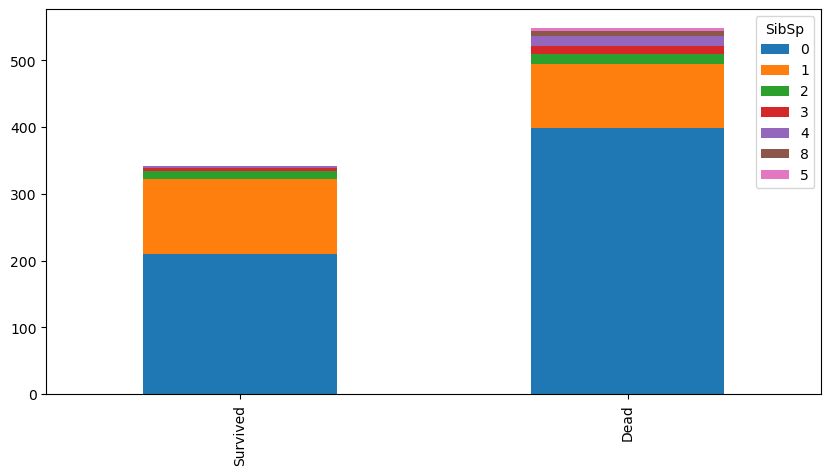

In [11]:
bar_chart('SibSp')

The Chart confirms **a person aboarded with more than 2 siblings or spouse** more likely survived  
The Chart confirms ** a person aboarded without siblings or spouse** more likely dead

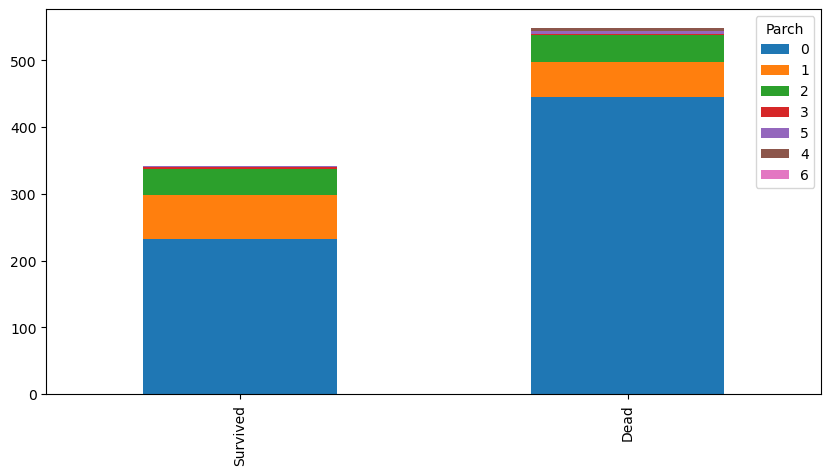

In [12]:
bar_chart('Parch')

The Chart confirms **a person aboarded with more than 2 parents or children** more likely survived  
The Chart confirms **a person aboarded alone** more likely dead

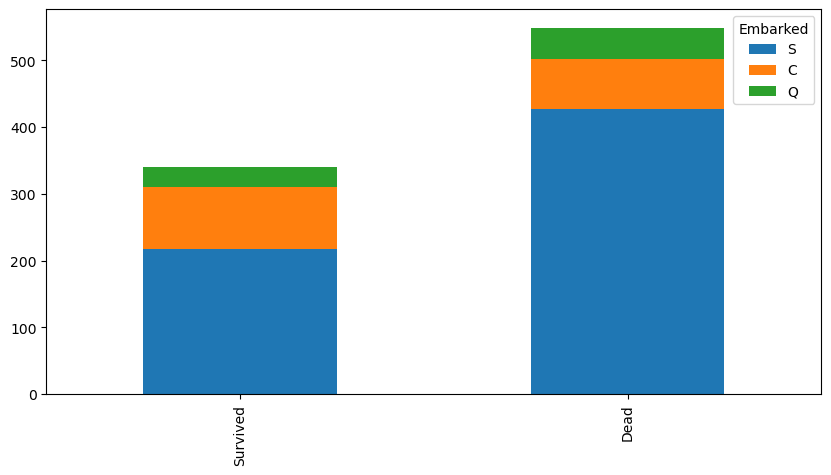

In [13]:
bar_chart('Embarked')

The char confirms the most survived from Cherbourg .So, maybe much of them at 1st class or women.Unlike Southhumbton most of them dead. 

## 4. Data Preprocessing & Feature Engineering

Our mission here now is gradually to **deleate outlairs** then **deal with NAN** then **make encoding to Cat feature** then **feature selection** then **make feature scaling** **for each feature**.


### 4.1 Pclass

#### 4.1.1 Dealing with nulls
1-If a column has a very high percentage of missing values (e.g., > 50%), it might be better to drop that column, as it may not provide useful information. **df.dropna(axis=1)**

2- If only a small percentage of your dataset contains NaNs (e.g., < 5%), it might be better to simply drop those rows rather than the entire feature. **df.dropna()**

3- Else impute them.Fill NaN values with appropriate statistics (mean, median, mode) using **df.fillna()**

In [14]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

As we see Pclass doesn't have nulls

#### 4.1.2 deleting outlairs

In [15]:
train['Pclass'].unique()

array([3, 1, 2])

In [16]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

There aren't outlair or high cardinality

### 4.2 Name

Don't statically matters so we will drop it

In [17]:
train.drop(["Name"],axis=1,inplace=True)

### 4.3 Sex

#### 4.3.1 Encoding it

In [18]:
sex_mapping = {"male": 0, "female": 1}

train['Sex'] = train['Sex'].map(sex_mapping)

In [19]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C


In [20]:
#Checking cardinality
train['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

No cardinality

### 4.4 Age

#### 4.4.1 Deal with nans

In [21]:
train["Age"].isnull().sum()

177

As we see 177/891 is <50% and >15% So, we will fillna

In [22]:
train['Age'].fillna(train['Age'].median(), inplace=True)

/tmp/ipykernel_4921/486169235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)


In [23]:
train["Age"].isnull().sum()

0

Thats okay!

#### 4.4.2 Deal with outlairs

<AxesSubplot:ylabel='Age'>

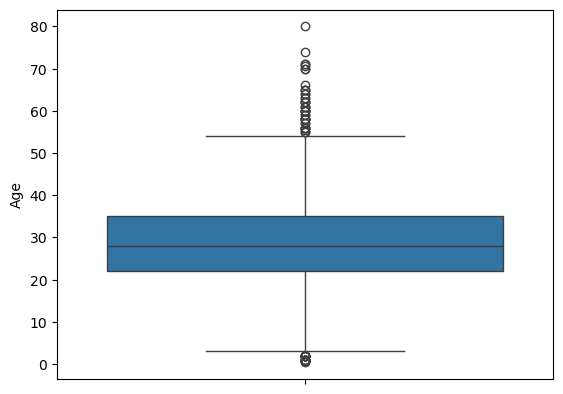

In [24]:
#check outlairs
sns.boxplot(train['Age'])

In [25]:
# calc Q1 and Q3
Q1 = train['Age'].quantile(0.25)
Q3 = train['Age'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
train = train[(train['Age'] >= lower_bound) & (train['Age'] <= upper_bound)]



In [26]:
train.shape

(825, 11)

We remove records of outlairs so dataset rows reach to 825

### 4.5 Ticket

In [27]:
# As it don't affect so we will drop it as name
train.drop(["Ticket"],axis=1,inplace=True)

/tmp/ipykernel_4921/789221583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(["Ticket"],axis=1,inplace=True)


### 4.6 Fare

#### 4.6.1 outlairs

<AxesSubplot:ylabel='Fare'>

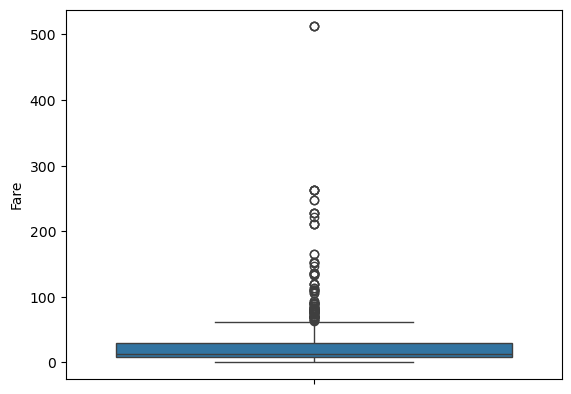

In [28]:
#check outlairs
sns.boxplot(train['Fare'])

In [29]:
# calc Q1 and Q3
Q1 = train['Fare'].quantile(0.25)
Q3 = train['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
train = train[(train['Fare'] >= lower_bound) & (train['Fare'] <= upper_bound)]

In [30]:
train.shape

(718, 10)

#### 4.6.1 Scalling it

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train['Fare'] = scaler.fit_transform(train[['Fare']])


The "Fare" feature can have a wide range of values, which could affect the performance of machine learning algorithms that rely on distance metrics or gradient descent

### 4.7 Cabin

In [32]:
# As most of values are nulls
train.drop(["Cabin"],axis=1,inplace=True)

### 4.8 Embarked

#### 4.8.1 Deal with nulls

In [33]:
train['Embarked'].isnull().sum()

0

Nulls in embarek records removed already!

#### 4.8.2 Encoding

In [34]:
train['Embarked'].value_counts()

Embarked
S    543
C    104
Q     71
Name: count, dtype: int64

In [35]:
Emparked_mapping = {"S": 0, "C": 1,"Q":2}

train['Embarked'] = train['Embarked'].map(Emparked_mapping)

In [36]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,-0.751265,0
2,3,1,3,1,26.0,0,0,-0.700265,0
3,4,1,1,1,35.0,1,0,2.712961,0
4,5,0,3,0,35.0,0,0,-0.690821,0
5,6,0,3,0,28.0,0,0,-0.659971,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,-0.316820,0
887,888,1,1,1,19.0,0,0,0.967626,0
888,889,0,3,1,28.0,1,2,0.472736,0
889,890,1,1,0,26.0,0,0,0.967626,1


### Feature selection

In [37]:
# Separate features and target variable
X = train.drop(['Survived','PassengerId'], axis=1)
y = train['Survived']

In [38]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,-0.751265,0
2,3,1,26.0,0,0,-0.700265,0
3,1,1,35.0,1,0,2.712961,0
4,3,0,35.0,0,0,-0.690821,0
5,3,0,28.0,0,0,-0.659971,2
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,-0.316820,0
887,1,1,19.0,0,0,0.967626,0
888,3,1,28.0,1,2,0.472736,0
889,1,0,26.0,0,0,0.967626,1


In [40]:
# Split into training and testing sets
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)


## Modeling

In [45]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(report)

Logistic Regression Accuracy: 0.7778
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        95
           1       0.69      0.63      0.66        49

    accuracy                           0.78       144
   macro avg       0.75      0.74      0.75       144
weighted avg       0.77      0.78      0.78       144

Decision Tree Accuracy: 0.7500
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        95
           1       0.62      0.67      0.65        49

    accuracy                           0.75       144
   macro avg       0.72      0.73      0.73       144
weighted avg       0.76      0.75      0.75       144

Random Forest Accuracy: 0.7917
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        95
           1       0.69      0.71      0.70        49

    accuracy                           0.79       144
   macro avg       0.77      